<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec13-KMeans.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# K-means clustering
---


Read more:

- [Unsupervised learning - wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Cluster analysis - wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means clustering - wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)
- [Clustering user guide - sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [KMeans - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Find optimal k clusters - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)
- [Silhouette (clustering) - wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))


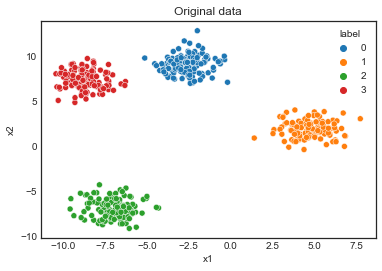

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("seaborn-white")

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

# , columns = ["x1", "x2", "label"])
df = pd.DataFrame([X[:, 0], X[:, 1], y]).T

df.columns = ["x1", "x2", "label"]
df["label"] = df.label.astype(int)

sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data");


In [ ]:
# we don't have labels in unsupervised learning
# in this simulation we drop the label, but for real world data there is no label in beginning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


---
## Feature scaling

- need to scale dataset with either feature standardization or normalization
- in unsupervised, as there is no label, we can use the whole dataset in scaling
- we don't divide into training and test dataset, instead we use the whole dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

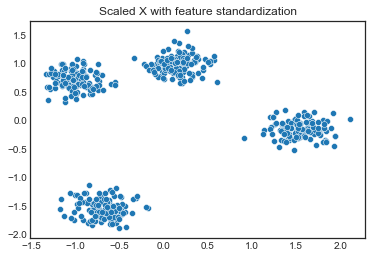

In [ ]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization");

---
## k-means clustering

- k-means clustering is an unsupervised learning algorithm, which means that there are no labels

1. $k$ number of clusters are chosen
2. $k$ points are randomly selected as cluster centers
3. the nearest points to each cluster center are classified as that cluster
4. the center of the cluster is recalculated
5. repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

### Choose k

- plot an elbow plot of sum of squared distances (inertia in sklearn) and find the an inflexion point to choose $k$, i.e. the point with significant lower rate of change than before (note that this might be hard to find exact)
- domain skills, it's important to understand your dataset to find an adequate $k$ and also equally important to be able to know what the clusters represent
- note that it is hard to find correct number of clusters, and it is here the art and domain skills become more important


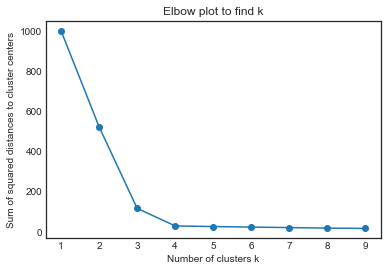

In [ ]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, '-o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters k",
       ylabel="Sum of squared distances to cluster centers");

# note here that it is very hard to pick 3 or 4 clusters as the clusters are close to each other 

In [ ]:
SSD_differences = pd.Series(sum_squared_distances).diff()[1:]
SSD_differences.index = clusters[:-1]
SSD_differences

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.154969
5     -2.776087
6     -2.379098
7     -2.601663
8     -1.555593
dtype: float64

---
## Silhouette score 

Note that it's usually not possible to plot the clusters, instead the silhouette score in combination with elbow plot can help in determining clusters. 

- silhouette score is a measure of cluster tightness

The silhoutte coefficient $S_i$ is calculated as 
$$S_i = \frac{b_i-a_i}{\max{\{a_i, b_i\}}}$$
,where 
- $a_i$ is mean distance between i and other points in the cluster it belongs to
- $b_i$ is the mean distance from i to clusters it doesn't belong to

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value

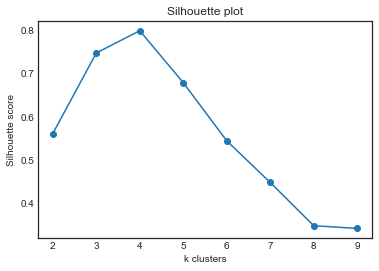

In [ ]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_list, "o-")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

---
### Visualization

- note that we don't have the luxury to visualize real world data as dimensions usually are much higher than 2

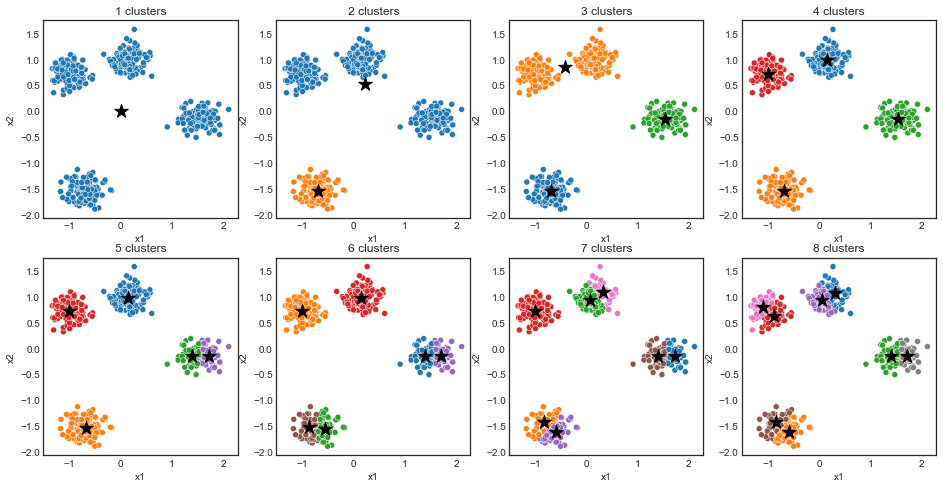

In [ ]:
kmeans = [KMeans(n_clusters=k).fit(scaled_X) for k in clusters]

df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

number_plots = round(len(clusters)/2)

fig, axes = plt.subplots(2, number_plots, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2",
                    hue="label", ax=ax, palette="tab10")

    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200,
            marker = '*', color="black", label="centroid")
    ax.legend([],[], frameon = False)
    ax.set(title = f"{i+1} clusters")


---
# Color quantization with k-means
---

Read more:

- [OpenCV](https://docs.opencv.org/4.x/index.html)
- [imread() - OpenCV](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)

---


## Image processing

We use OpenCV in Python for image processing. Install it through

```
pipenv install opencv-python
```

This library has existed for very long time and the documentation looks very old, but it is very useful for various kinds of image processing

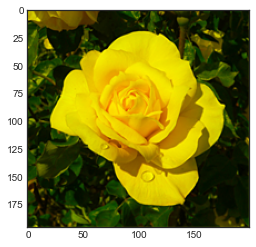

In [ ]:
import matplotlib.pyplot as plt 
import cv2
import numpy as np 

plt.style.use("seaborn-white")

# blue green red
img_BGR = cv2.imread("../data/blomma.png")

# convert BGR to RGB 
flower = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(flower);

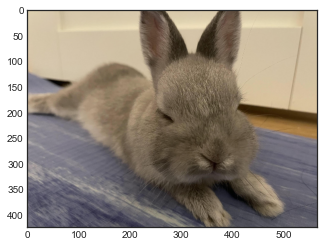

In [ ]:
img_BGR = cv2.imread("../data/bella2.jpeg")
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# make image smaller
rabbit = cv2.resize(img, (int(img.shape[1]*.4), int(img.shape[0]*.4)))

plt.imshow(rabbit)


---
## Color quantization 
Reduce number of colors in an image by replacing with cluster center. These cluster centers can be computed with k-means algorithm.

- useful for simple color segmentation 
- useful when a display only can show a small number of colors
- can be used for compression 

First we flatten the each of the 3 matrices (R, G, B) to one dimensional vector for each color channel resulting in:

| R   | G   | B   |
| --- | --- | --- |
| R1  | G1  | B1  |
| R2  | G2  | B2  |
| ... | ... | ... |
| RN  | GN  | BN  |

Using k-means with $k$ as the number of colors, we find the cluster centers and give that color to every point in that cluster. Finally reshape it back to original shape.

Cluster centers: [[0.12594709 0.16445658 0.        ]
 [0.86960004 0.75798583 0.        ]]
Cluster labels: [1 1 1 ... 0 0 0]


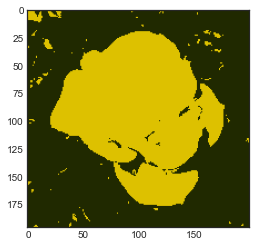

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# note that the wildcard -1 calculates row*columns
X = flower.reshape(-1, 3)

# need to normalize data to 0-1
scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

kmean = KMeans(2)
kmean.fit(scaled_X)

print("Cluster centers:",kmean.cluster_centers_)
print("Cluster labels:", kmean.labels_)

# 1 picks second cluster center, all 0 picks first cluster center
quantized_color_space = kmean.cluster_centers_[kmean.labels_]

quantized = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized)


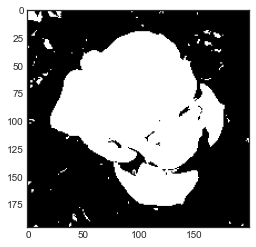

In [ ]:
# segmentation
mask = (quantized[:,:,1] >.75)
plt.imshow(mask, cmap = "gray")

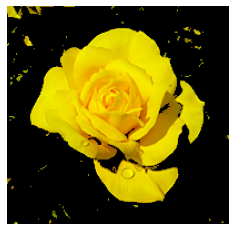

In [ ]:
segmented_flower = (mask[:, :, None]*flower)
plt.imshow(segmented_flower)
plt.axis("off");


---
## Reduce colors

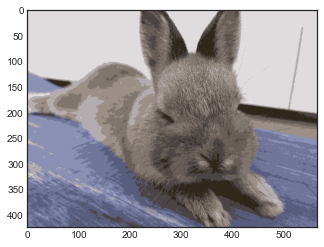

In [ ]:
X = rabbit.reshape(-1, 3)
scaled_X = scaler.fit_transform(X)

# for example a device can only show 10 discrete colors

kmean = KMeans(10)
kmean.fit(scaled_X)
quantized_color_space = kmean.cluster_centers_[kmean.labels_]

quantized = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized);